In [8]:
import matplotlib.pyplot as plt
import json
import seaborn as sns

filepath = 'result/cora_VGAE.txt'
with open(filepath, 'r') as f:
    metrics = json.load(f)
print(metrics.keys())

dict_keys(['train_loss', 'train_acc', 'val_acc', 'val_roc', 'val_ap', 'test_ap', 'test_roc', 'test_acc'])


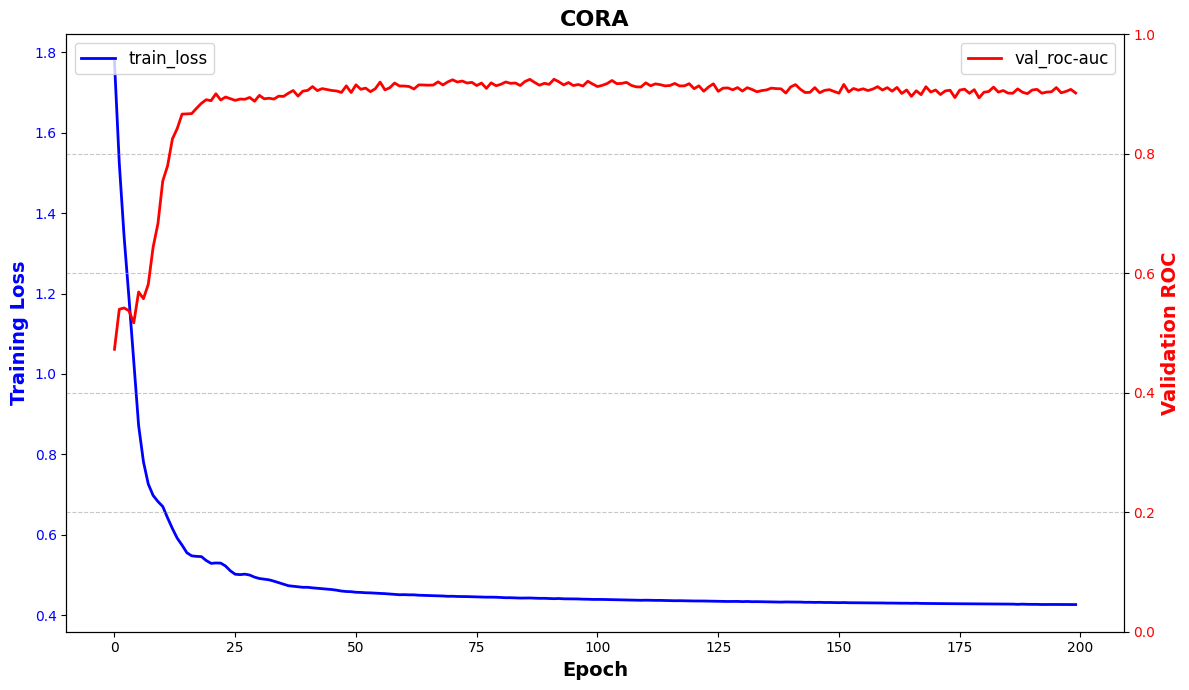

In [9]:
def plot_metrics(metrics, metric_names, title):
    """
    绘制多个指标的训练过程图线。

    Args:
        metrics (dict): 包含训练过程数据的字典。
        metric_names (list): 要绘制的指标名称列表。
        title (str): 图的标题。
    """
    plt.figure(figsize=(12, 7))  # 设置图形大小
    for metric_name in metric_names:
        if metric_name in metrics:
            # 使用 Seaborn 的 lineplot，并增加更多的样式定制
            sns.lineplot(x=range(len(metrics[metric_name])), 
                         y=metrics[metric_name], 
                         label=metric_name, 
                         linewidth=2,  # 线条宽度
                        #  marker="o",  # 在每个点上标记圆圈
                         markersize=8,  # 点的大小
                         dashes=False)  # 实线
        else:
            print(f"Metric '{metric_name}' not found in data.")
    
    # 设置图表的标题和标签
    plt.xlabel('Epoch', fontsize=14, weight='bold')  # x轴标签
    plt.ylabel('Value', fontsize=14, weight='bold')  # y轴标签
    plt.title(title, fontsize=16, weight='bold')  # 图标题
    plt.legend(title='Metrics', title_fontsize='13', loc='upper left')  # 图例设置
    plt.grid(True, linestyle='--', alpha=0.7)  # 网格线，虚线，透明度设置
    plt.tight_layout()  # 自动调整布局，避免标签被截断
    plt.savefig(filepath.split('.')[0] + "_".join(metric_names) + '.png')
    plt.show()

def load_metrics(filepath):
    """
    从文件中加载训练过程数据。

    Args:
        filepath (str): 文件路径。

    Returns:
        dict: 包含训练过程数据的字典。
    """
    with open(filepath, 'r') as f:
        metrics = json.load(f)
    return metrics

def plot_metrics2(metrics, metric_names, title):
    """
    绘制训练损失和验证 ROC 曲线，使用双纵轴显示。
    
    Args:
        metrics (dict): 包含训练过程数据的字典。
        metric_names (list): 要绘制的指标名称列表，必须包含 'train_loss' 和 'val_roc'。
        title (str): 图的标题。
    """
    fig, ax1 = plt.subplots(figsize=(12, 7))  # 创建图表，ax1是左侧纵轴
    
    # 绘制 train_loss，使用左侧纵轴
    if 'train_loss' in metrics:
        sns.lineplot(x=range(len(metrics['train_loss'])), 
                     y=metrics['train_loss'], 
                     label='train_loss', 
                     linewidth=2, 
                    #  marker="o", 
                     markersize=8, 
                     ax=ax1,  # 将线图绘制在左侧纵轴
                     color='b')
        ax1.set_xlabel('Epoch', fontsize=14, weight='bold')  # 设置x轴标签
        ax1.set_ylabel('Training Loss', fontsize=14, weight='bold', color='b')  # 左侧纵轴标签
        ax1.tick_params(axis='y', labelcolor='b')  # 左侧纵轴刻度颜色为蓝色
    else:
        print("Metric 'train_loss' not found in data.")

    # 创建右侧纵轴
    ax2 = ax1.twinx()  # 创建共享x轴的右侧纵轴
    ax2.set_ylim(0, 1)  # 设置右侧纵轴的范围
    
    # 绘制 val_roc，使用右侧纵轴
    if 'val_roc' in metrics:
        sns.lineplot(x=range(len(metrics['val_roc'])), 
                     y=metrics['val_roc'], 
                     label='val_roc-auc', 
                     linewidth=2, 
                    #  marker="o", 
                     markersize=8, 
                     ax=ax2,  # 将线图绘制在右侧纵轴
                     color='r')
        ax2.set_ylabel('Validation ROC', fontsize=14, weight='bold', color='r')  # 右侧纵轴标签
        ax2.tick_params(axis='y', labelcolor='r')  # 右侧纵轴刻度颜色为红色
    else:
        print("Metric 'val_roc' not found in data.")

    # 设置标题
    plt.title(title, fontsize=16, weight='bold')

    # 图例设置
    ax1.legend(loc='upper left', fontsize=12)
    ax2.legend(loc='upper right', fontsize=12)

    # 美化图形
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()  # 自动调整布局，避免标签被截断
    plt.savefig(filepath.split('.')[0] + "_".join(metric_names) + '.pdf')
    plt.show()

plot_metrics2(metrics, ['train_loss', 'val_roc'], 'CORA')